# Convert Scanco Volumes to Open Standards

This notebook illustrates how to convert Scanco microCT images into open standard file formats while preserving critical image metadata.

### Install notebook dependencies

In [ ]:
import sys
!{sys.executable} -m pip install itk-ioscanco xarray zarr tqdm pooch 'itkwidgets[all]>=1.0a21'

### Imports

In [4]:
import pooch

from itkwidgets import view

import itk
import numpy as np
import xarray as xr
import zarr

### Download example data

In [8]:
file_name = 'C0004255.ISQ'
file_url = 'https://data.kitware.com/api/v1/file/591e56178d777f16d01e0d20/download'
file_sha256 = 'c2a3750c75826cb077d92093d43976cc0350198b55edecd681265eebabfb438b'
file_path = pooch.retrieve(file_url, file_sha256, fname=file_name, progressbar=True)

### Read in the Scanco image file, *.ISQ* or *.AIM*.

In [9]:
image = itk.imread(file_path)

The type of the image is an `itk.Image`.

In [10]:
print(isinstance(image, itk.Image))
print(type(image))

True
<class 'itk.itkImagePython.itkImageSS3'>



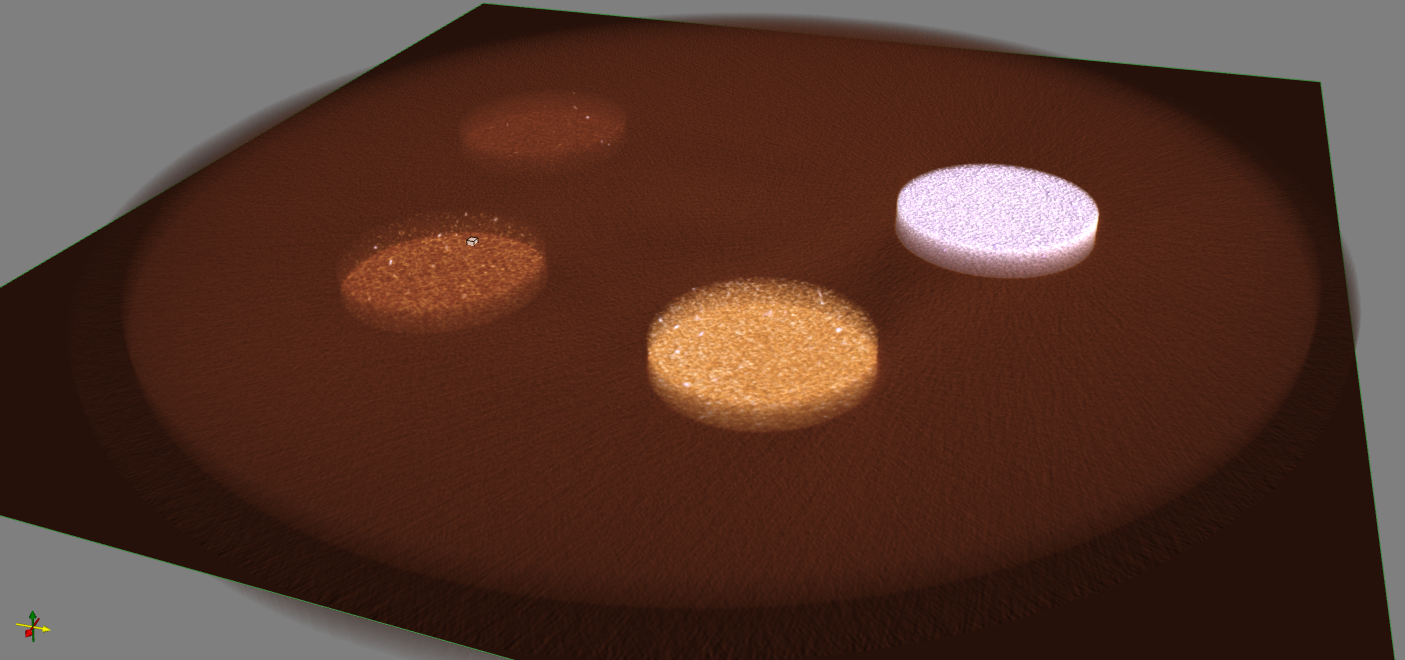
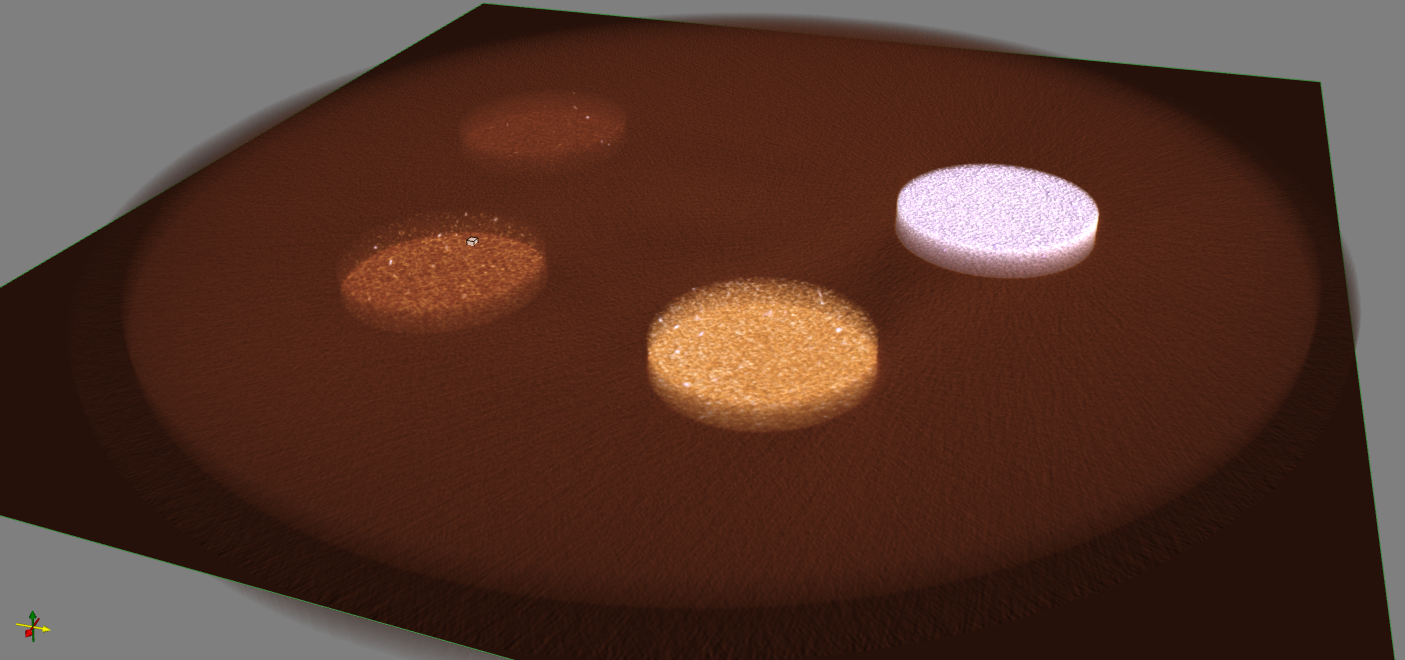

<IPython.core.display.Javascript object>

In [12]:
view(image)

### View the data with standard Python data types

Get the pixel data as a NumPy `ndarray`.

In [13]:
pixel_data = np.asarray(image)
pixel_data

array([[[-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        ...,
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000]],

       [[-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        ...,
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000]],

       [[-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        ...,
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -10

Get the image metadata as a `dict`.

In [14]:
metadata = dict(image)
metadata

{'CalibrationData': '45 kVp, 0.5mm Al, BH: 1200mg HA/ccm, Scaling 4096',
 'CreationDate': '5-JUN-2015 11:09:18.880',
 'DataRange': (-2813.0, 32767.0),
 'Energy': 45.0,
 'Intensity': 0.177,
 'MeasurementIndex': 4937,
 'ModificationDate': '5-JUN-2015 11:09:18.880',
 'MuScaling': 4096.0,
 'MuWater': 0.7032999992370605,
 'NumberOfProjections': 500,
 'NumberOfSamples': 1024,
 'PatientIndex': 78,
 'PatientName': 'COLE-BPBP',
 'ReconstructionAlg': 3,
 'ReferenceLine': 0.0,
 'RescaleIntercept': -1000.0,
 'RescaleSlope': 0.34713582434927287,
 'RescaleType': 2,
 'RescaleUnits': 'mg HA/ccm',
 'SampleTime': 400.0,
 'ScanDistance': 36.864000000000004,
 'ScannerID': 2135,
 'ScannerType': 10,
 'Site': 5,
 'SliceIncrement': 0.036000000000000004,
 'SliceThickness': 0.036000000000000004,
 'Version': 'CTDATA-HEADER_V1',
 'origin': array([0., 0., 0.]),
 'spacing': array([0.036, 0.036, 0.036]),
 'direction': array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])}

### MetaImage

[MetaImage](https://itk.org/Wiki/ITK/MetaIO/Documentation) is a multi-dimension scientific image file format supported by [Kitware](https://www.kitware.com)-supported open source tools, i.e. [ITK](https://www.itk.org) and [VTK](https://www.vtk.org)-based tools.

MetaImage:

- Supports 3D images with pixel with types like `signed short`.
- Image spatial metadata, i.e. `origin`, `spacing`, and `direction`.
- Supports additional key / value metadata.

In [15]:
itk.imwrite(image, 'image.mha')

In [16]:
image_meta = itk.imread('image.mha')
dict(image_meta)

{'CalibrationData': '45 kVp, 0.5mm Al, BH: 1200mg HA/ccm, Scaling 4096',
 'CreationDate': '5-JUN-2015 11:09:18.880',
 'DataRange': '32767 32767',
 'Energy': '45',
 'ITK_InputFilterName': 'MetaImageIO',
 'Intensity': '0.177',
 'MeasurementIndex': '4937',
 'ModificationDate': '5-JUN-2015 11:09:18.880',
 'MuScaling': '4096',
 'MuWater': '0.7033',
 'NumberOfProjections': '500',
 'NumberOfSamples': '1024',
 'PatientIndex': '78',
 'PatientName': 'COLE-BPBP',
 'ReconstructionAlg': '3',
 'ReferenceLine': '0',
 'RescaleIntercept': '-1000',
 'RescaleSlope': '0.347136',
 'RescaleType': '2',
 'RescaleUnits': 'mg HA/ccm',
 'SampleTime': '400',
 'ScanDistance': '36.864',
 'ScannerID': '2135',
 'ScannerType': '10',
 'Site': '5',
 'SliceIncrement': '0.036',
 'SliceThickness': '0.036',
 'Version': 'CTDATA-HEADER_V1',
 'origin': array([0., 0., 0.]),
 'spacing': array([0.036, 0.036, 0.036]),
 'direction': array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])}

### NRRD

[NRRD](http://teem.sourceforge.net/nrrd/format.html) is the file format from the teem library, popular with the [3D Slicer](https://www.slicer.org/) community.

In [17]:
itk.imwrite(image, 'image.nrrd')

In [18]:
image_nrrd = itk.imread('image.nrrd')
dict(image_nrrd)

{'CalibrationData': '45 kVp, 0.5mm Al, BH: 1200mg HA/ccm, Scaling 4096',
 'CreationDate': '5-JUN-2015 11:09:18.880',
 'DataRange': '',
 'Energy': '',
 'ITK_InputFilterName': 'NrrdImageIO',
 'Intensity': '',
 'MeasurementIndex': '',
 'ModificationDate': '5-JUN-2015 11:09:18.880',
 'MuScaling': '',
 'MuWater': '',
 'NRRD_kinds[0]': 'domain',
 'NRRD_kinds[1]': 'domain',
 'NRRD_kinds[2]': 'domain',
 'NRRD_space': 'left-posterior-superior',
 'NumberOfProjections': '',
 'NumberOfSamples': '',
 'PatientIndex': '',
 'PatientName': 'COLE-BPBP',
 'ReconstructionAlg': '',
 'ReferenceLine': '',
 'RescaleIntercept': '',
 'RescaleSlope': '',
 'RescaleType': '',
 'RescaleUnits': 'mg HA/ccm',
 'SampleTime': '',
 'ScanDistance': '',
 'ScannerID': '',
 'ScannerType': '',
 'Site': '',
 'SliceIncrement': '',
 'SliceThickness': '',
 'Version': 'CTDATA-HEADER_V1',
 'origin': array([0., 0., 0.]),
 'spacing': array([0.036, 0.036, 0.036]),
 'direction': array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0

### Zarr

[Zarr](https://zarr.readthedocs.io/en/stable/) is a next generation file format popular in the scientific Python community, but also usable across other programming languages.

Zarr has many advantages:

- A simple format, supporting multi-dimensional arrays and metadata, with broad adoption across the scientific computing community.
- Excellent compression.
- Distributed, parallel computing friendly.
- Web friendly.

[xarray](https://xarray.pydata.org/en/stable/) provides an interface for working with label multi-dimensional arrays, and supports serialization to zarr.

In [19]:
image_da = itk.xarray_from_image(image)
image_da

<xarray.DataArray 'image' (z: 51, y: 1024, x: 1024)>
array([[[-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        ...,
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000]],

       [[-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        ...,
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000]],

       [[-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        ...,
...
        ...,
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000]],

       [[-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        ...,
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000]],

       [[-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        ...,
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000],
        [-1000, -1000, -1000, ..., -1000, -1000, -1000]]], dtype=int16)
Coordinates:
  * x        (x) float64 0.0 0.036 0.072 0.108 0.144 ... 36.72 36.76 36.79 36.83
  * y        (y) float64 0.0 0.036 0.072 0.108 0.144 ... 36.72 36.76 36.79 36.83
  * z        (z) float64 0.0 0.036 0.072 0.108 0.144 ... 1.692 1.728 1.764 1.8
Attributes: (12/28)
    direction:            [[1. 0. 0.]\n [0. 1. 0.]\n [0. 0. 1.]]
    CalibrationData:      45 kVp, 0.5mm Al, BH: 1200mg HA/ccm, Scaling 4096
    CreationDate:         5-JUN-2015 11:09:18.880
    DataRange:            (-2813.0, 32767.0)
    Energy:               45.0
    Intensity:            0.177
    ...                   ...
    ScannerID:            2135
    ScannerType:          10
    Site:                 5
    SliceIncrement:       0.036000000000000004
    SliceThickness:       0.036000000000000004
    Version:              CTDATA-HEADER_V1

In [20]:
image_ds = image_da.to_dataset(name='image')
with zarr.storage.ZipStore('image.zarr.zip', mode='w', compression=0) as store:
    image_ds.to_zarr(store, mode='w', compute=True)

In [21]:
image_ds = xr.open_zarr('image.zarr.zip')

In [22]:
image_zarr = itk.image_from_xarray(image_ds.image)
dict(image_zarr)

{'CalibrationData': '45 kVp, 0.5mm Al, BH: 1200mg HA/ccm, Scaling 4096',
 'CreationDate': '5-JUN-2015 11:09:18.880',
 'Energy': 45.0,
 'Intensity': 0.1770000010728836,
 'MeasurementIndex': 4937,
 'ModificationDate': '5-JUN-2015 11:09:18.880',
 'MuScaling': 4096.0,
 'MuWater': 0.7032999992370605,
 'NumberOfProjections': 500,
 'NumberOfSamples': 1024,
 'PatientIndex': 78,
 'PatientName': 'COLE-BPBP',
 'ReconstructionAlg': 3,
 'ReferenceLine': 0.0,
 'RescaleIntercept': -1000.0,
 'RescaleSlope': 0.3471358120441437,
 'RescaleType': 2,
 'RescaleUnits': 'mg HA/ccm',
 'SampleTime': 400.0,
 'ScanDistance': 36.86399841308594,
 'ScannerID': 2135,
 'ScannerType': 10,
 'Site': 5,
 'SliceIncrement': 0.035999998450279236,
 'SliceThickness': 0.035999998450279236,
 'Version': 'CTDATA-HEADER_V1',
 'origin': array([0., 0., 0.]),
 'spacing': array([0.036, 0.036, 0.036]),
 'direction': array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])}